In [12]:
import sys
sys.path.append('../src')

In [13]:
from spatial_transfer import StyleTransfer
from utils import imshow
from masks import *

In [14]:
import torch
import math

def get_masks(imsize=128):
    masks=[get_left_side_mask(imsize), get_upper_right_corner_mask(imsize)]
    masks = torch.stack(masks)
    return masks

In [15]:
st = StyleTransfer()

Using default pre-trained network
Using default style and content layers


In [16]:
style_paths = ['./images/picasso.jpg', './images/klee.jpg']
content_path  = './images/dancing.jpg'
masks = get_masks()

In [17]:
output = st.run_style_transfer(content_path, style_paths, spatial_mask=masks, num_steps=5)

Building the style transfer model..
Optimizing..


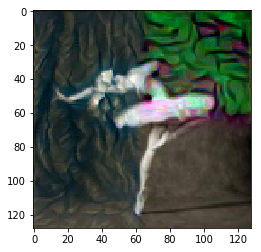

In [18]:
imshow(output)